# Deterministic Random Walk with Trap

Deterministic analysis of random walk with absorbing boundaries using probability lattices. Computes exact survival probabilities and mean first passage times analytically.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
def prob_latt(time, l, x_0, p):
    latt = np.zeros((time, l))
    latt[0, x_0] = 1
    q = 1 - p
    for t in range(time-1):
        for i in range(l):
            if latt[t, i] != 0:
                if i == 0:
                    latt[t+1, i+1] += latt[t, i] * p
                elif i == l-1:
                    latt[t+1, i-1] += latt[t, i] * q
                else:
                    latt[t+1, i+1] += latt[t, i] * p
                    latt[t+1, i-1] += latt[t, i] * q
    return latt

In [39]:
def lifetime(latt, time, p, l):
    mean_lifetime = 0
    q = 1 - p
    for t in range(time):
        mean_lifetime += (t+1) * (latt[t, 0] * q + latt[t, (l-1)] * p)
    return mean_lifetime

In [49]:
latt = prob_latt(1000, 21, 20, 0.5)
print(lifetime(latt, 1000, 0.5, 21))

20.99280555147345


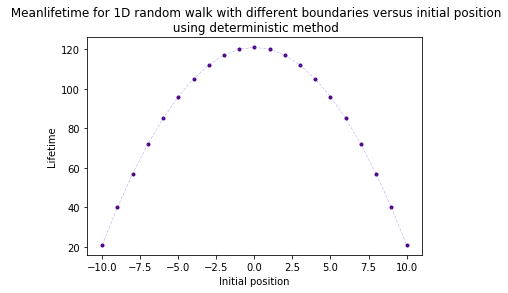

In [59]:
x = 10
initial_x = np.arange(-x, x+1, 1)
time = 1000
l = np.size(initial_x)
p = 0.5
lifetimes = np.zeros(l)


for i in range(l):
    latt = prob_latt(time, l, i, p)
    lifetimes[i] = lifetime(latt, time, p, l)


plt.plot(initial_x, lifetimes, '.', c = 'indigo')
plt.plot(initial_x, lifetimes, c = 'mediumslateblue', dashes=[10,5] , linewidth = 0.3)

plt.title(' Meanlifetime for 1D random walk with different boundaries versus initial position\n using deterministic method')
plt.ylabel('Lifetime')
plt.xlabel('Initial position')

plt.savefig('det_lifetime.png')

Here I'm going to use a minimal code to compare runtime with the previous algorithm

In [61]:
%%time

trap = 10
initial_x = np.arange(-trap, trap+1, 1)
time = 1000
l = np.size(initial_x)
p = 0.5
lifetimes = np.zeros(l)


for i in range(l):
    latt = prob_latt(time, l, i, p)
    lifetimes[i] = lifetime(latt, time, p, l)

print(lifetimes)

[ 20.99280555  39.98588969  56.97899951  71.97292251  84.9668948
  95.96214898 104.95747207 111.95444193 116.95149471 119.95042571
 120.94944695 119.95042571 116.95149471 111.95444193 104.95747207
  95.96214898  84.9668948   71.97292251  56.97899951  39.98588969
  20.99280555]
Wall time: 1.77 s
